In [45]:
from scipy.ndimage import correlate
import numpy as np
from skimage import color, io, measure, img_as_ubyte, img_as_float
from skimage.color import rgb2gray
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import pydicom as dicom
from skimage.util import img_as_ubyte


In [46]:
input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [47]:
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]

In [48]:
res_img = correlate(input_img, weights)
print(res_img[3][3])

108


The value means that when you apply the filter on top of pixel 3,3 in the input img, the weights are multiplied to the image and the entire sum of the neighborhood is now the resulting pixel value

Exercise 2

- "reflect" → natural-looking edges, smooth continuation.
- "constant", cval=10 → artificial border effect, visible frame because the constant value doesn’t match the real image values.


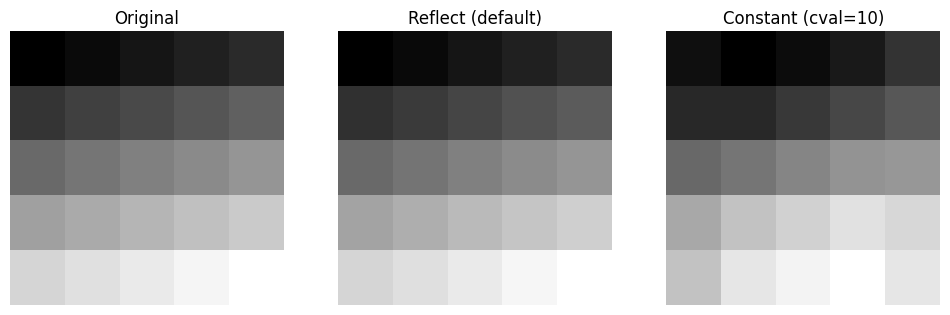

In [49]:

res_reflect = correlate(input_img, weights, mode="reflect")
res_constant = correlate(input_img, weights, mode="constant", cval=10)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(input_img, cmap="gray")
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(res_reflect, cmap="gray")
axes[1].set_title("Reflect (default)")
axes[1].axis("off")

axes[2].imshow(res_constant, cmap="gray")
axes[2].set_title("Constant (cval=10)")
axes[2].axis("off")

plt.show()

Reflect is best. It mirrors the original image so it looks natural. Constant shifts the edges towards the constand value and changes to composition of the image

Exercise 3

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\3609268657.py:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_gray)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\3609268657.py:12: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


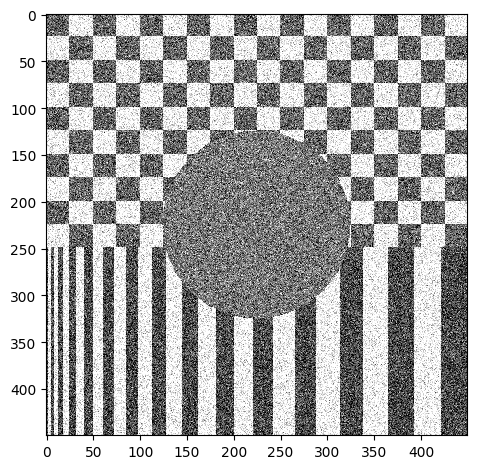

In [50]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "Gaussian.png"

im_org = io.imread(in_dir + im_name)

im_gray = rgb2gray(im_org)

io.imshow(im_gray)
io.show()

In [51]:
size = 20
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\2060380638.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(res_gaussian)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\2060380638.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


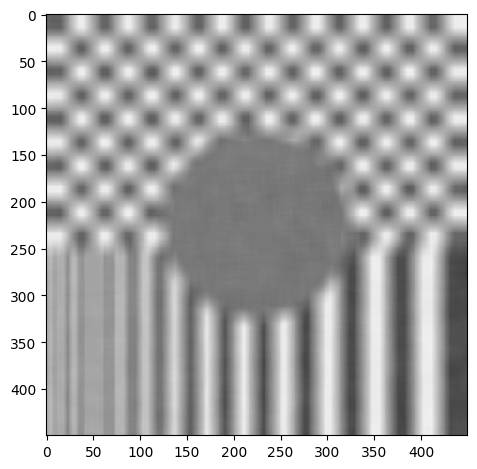

In [52]:
res_gaussian = correlate(im_gray, weights)

io.imshow(res_gaussian)
io.show()

Noise is reduced and the image is blurred. The transitions between colors becomes less sharp

Exercise 4

In [53]:
from skimage.filters import median

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\3440196194.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(med_img)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\3440196194.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


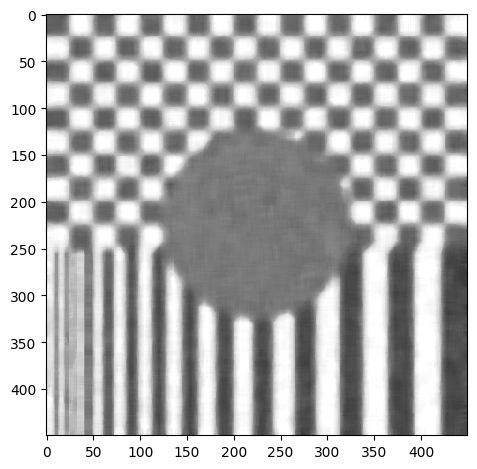

In [54]:
size = 15
footprint = np.ones([size, size])
med_img = median(im_gray, footprint)

io.imshow(med_img)
io.show()

Median filter also blurs, but it keeps more detail regarding edges and such, as it doesn't just average values out, it picks the middle one and therefore more sharpness is preserved. It can although be seen in the bottom left that when there are smaller quick changes, details are lost.

Exercise 5

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\236090069.py:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mean_img)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\236090069.py:15: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


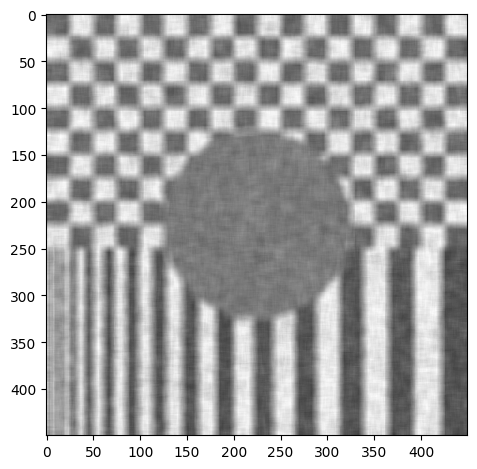

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\236090069.py:17: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(median_img)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\236090069.py:18: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


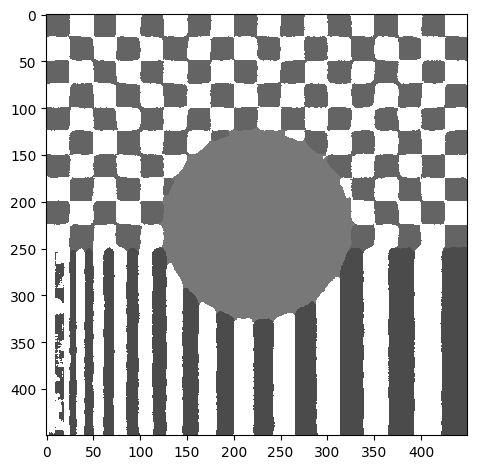

In [56]:
im_name = "SaltPepper.png"
im_snp = io.imread(in_dir + im_name)
im_snp = rgb2gray(im_snp)
size = 10
# Two dimensional filter filled with 1
mean_weights = np.ones([size, size])
# Normalize weights
mean_weights = mean_weights / np.sum(mean_weights)
footprint = np.ones([size, size])

mean_img = correlate(im_snp, mean_weights)
median_img = median(im_snp, footprint)

io.imshow(mean_img)
io.show()

io.imshow(median_img)
io.show()

The median filter reduces the noise much better, but it causes some weird artifacts with the edges, where they are warped

Exercise 6

In [58]:
from skimage.filters import gaussian

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1257315313.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gauss_img)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1257315313.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


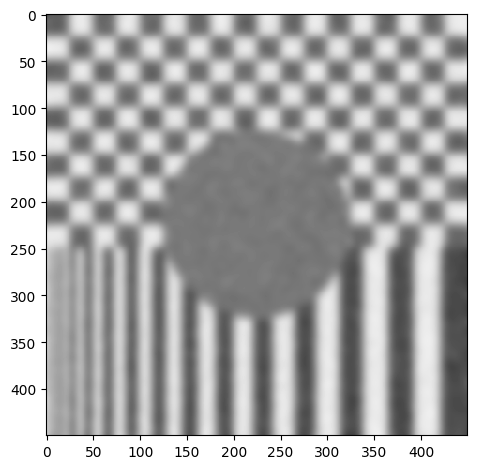

In [67]:
sigma = 5
gauss_img = gaussian(im_gray, sigma)

io.imshow(gauss_img)
io.show()

The image becomes more and more blurred and the noise is getting removed. The edges are pretty sharp still

Exercise 7

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1029020463.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_car)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1029020463.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


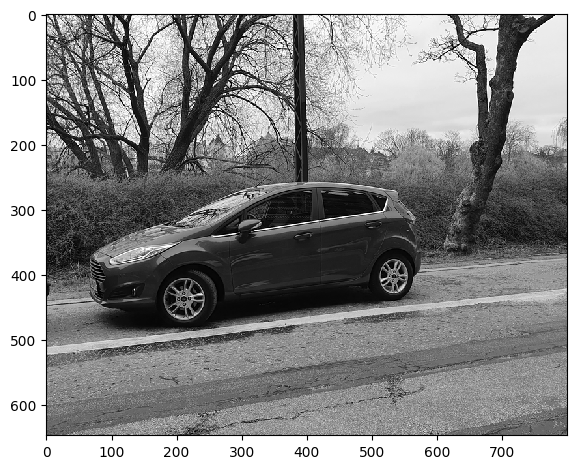

In [70]:
im_name = "car.png"
im_car = io.imread(in_dir + im_name)
im_car = rgb2gray(im_car)

io.imshow(im_car)
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1160018240.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(med_car)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1160018240.py:9: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


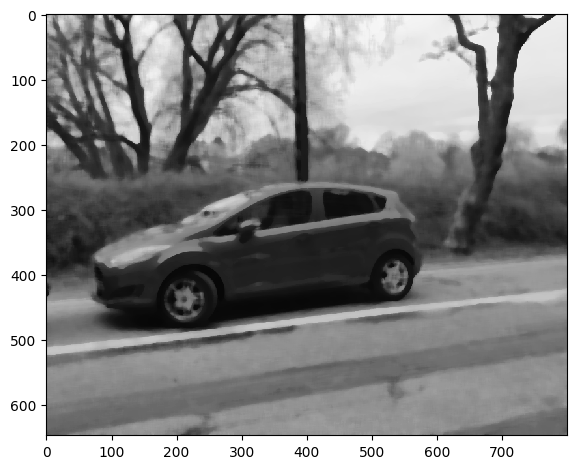

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1160018240.py:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gauss_car)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1160018240.py:12: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


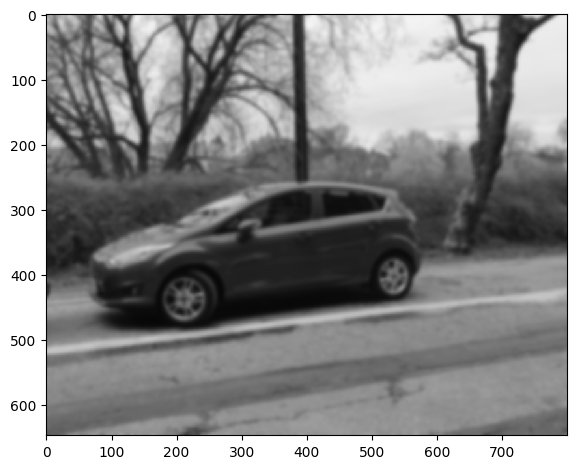

In [72]:
size = 10
footprint = np.ones([size, size])
sigma = 3

med_car = median(im_car, footprint)
gauss_car = gaussian(im_car, sigma)

io.imshow(med_car)
io.show()

io.imshow(gauss_car)
io.show()

The gaussion gived more of a natural blur, where the median seems to remove more detail and look like it is "guessing" more

Exercise 8

In [73]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\14131321.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_donald)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\14131321.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


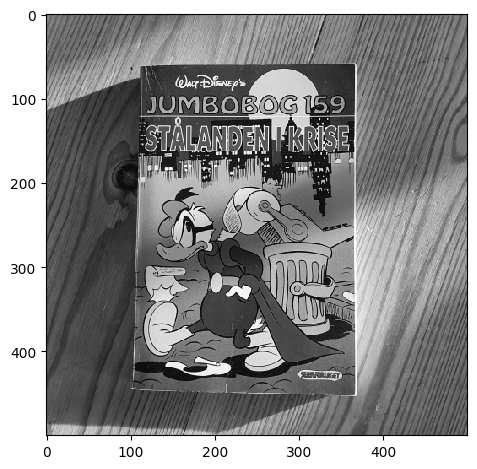

In [76]:
im_name = "donald_1.png"
im_donald = io.imread(in_dir + im_name)
im_donald = rgb2gray(im_donald)

io.imshow(im_donald)
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1169487052.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_donald_h)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1169487052.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


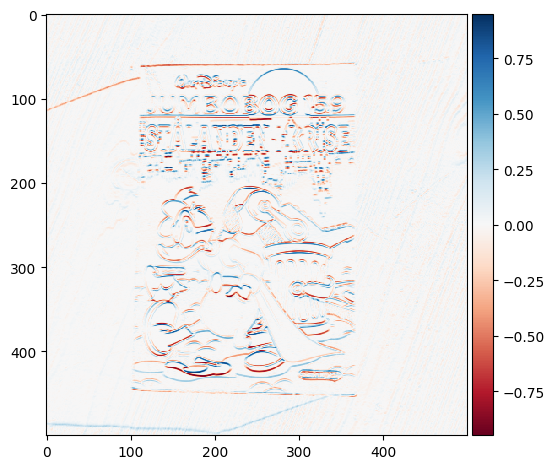

In [77]:
im_donald_h = prewitt_h(im_donald)
io.imshow(im_donald_h)
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1871855362.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_donald_v)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1871855362.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


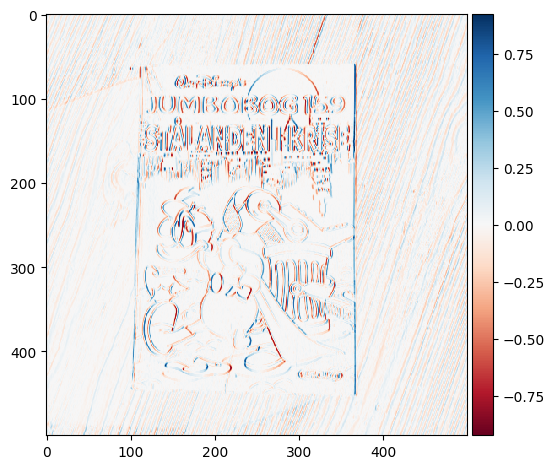

In [78]:
im_donald_v = prewitt_v(im_donald)
io.imshow(im_donald_v)
io.show()

Horizontal shows horizontal edges, where there is a big change in intesity going up and down.

Vertical shows vertical edges, where there is a big change in intensity going side to side.

Exercise 9

C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1092770928.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_donald_magnitude)
C:\Users\frede\AppData\Local\Temp\ipykernel_10364\1092770928.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


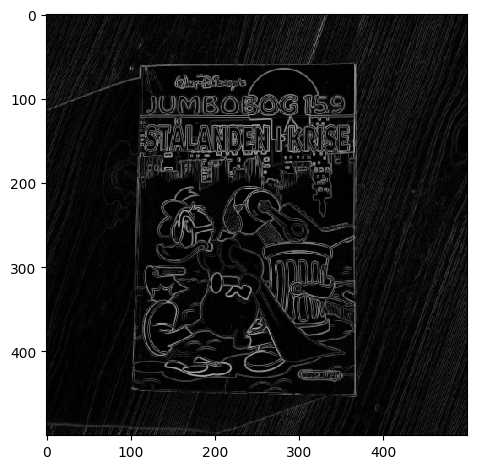

In [79]:
im_donald_magnitude = prewitt(im_donald)
io.imshow(im_donald_magnitude)
io.show()

This then shows a combination of all edges, meaning that edges, no matter orientation get captured here.

Exercise 10

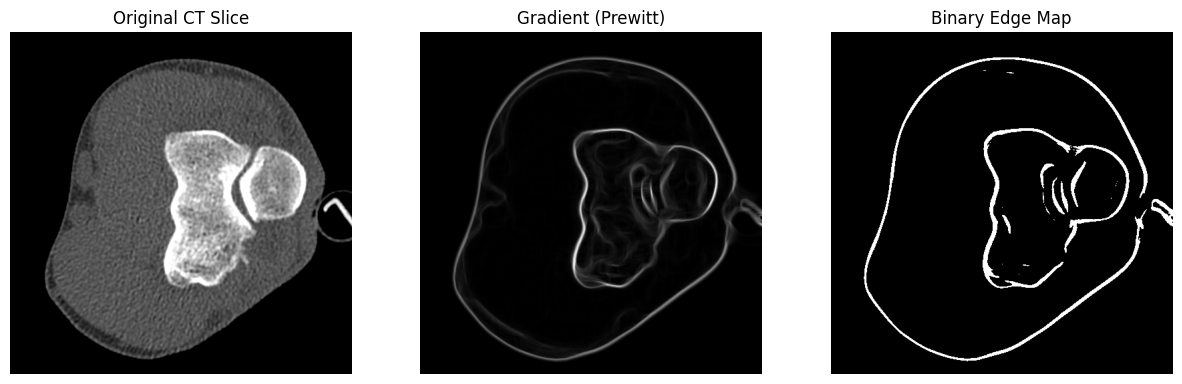

In [96]:
from numpy import square
from skimage.filters import threshold_otsu

im_name = "ElbowCTSlice.png"
im_ct = io.imread(in_dir + im_name)
im_ct = color.rgb2gray(im_ct)

# Step 2: Filter the image (choose one)
filtered = gaussian(im_ct, sigma=2)
# OR
size = 25
footprint = np.ones([size, size])
filtered = median(filtered, footprint)

# Step 3: Compute gradients using Prewitt
gradient = prewitt(filtered)

# Step 4: Compute Otsu's threshold
T = threshold_otsu(gradient)

# Step 5: Apply threshold to get binary edge map
binary_edges = gradient > T

# Step 6: Display results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im_ct, cmap='gray')
axes[0].set_title("Original CT Slice")
axes[0].axis('off')

axes[1].imshow(gradient, cmap='gray')
axes[1].set_title("Gradient (Prewitt)")
axes[1].axis('off')

axes[2].imshow(binary_edges, cmap='gray')
axes[2].set_title("Binary Edge Map")
axes[2].axis('off')

plt.show()


Exercise 11 and 12 (look in python file)

In [99]:
!python ./data/Ex4-VideoImageFiltering.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


The FPS goes drastically down when applying the median filter, as it has to do that for all pixels in the image